In [1]:
import pandas as pd
import numpy as np
import os
import datetime
from datetime import date
import calendar
pd.set_option('display.max_columns', None)

from langdetect import detect

In [2]:
def convert_to_day_of_week(date_str):
    try:
        date_ = datetime.date.fromisoformat(date_str)
        weekday = calendar.day_name[date_.weekday()]
    except:
        weekday = np.nan
    return weekday

#### Reports

In [3]:
# camp_dir_path = r'/home/aamin/files/marketing/campaign_reports_till_9dec2022-20221212T111230Z-001/campaign_reports_till_9dec2022/1148818'
# camp_filename_list = []
# for path in os.scandir(camp_dir_path):
#     if path.is_file():
#         camp_filename_list.append(path.name)

In [4]:
main_camp_dir_path = r'/home/aamin/files/marketing/copy/data/reports_dec_jan_intitution'
camp_filename_list = []

for folder_name in os.listdir(main_camp_dir_path):
    camp_dir_path = f'/home/aamin/files/marketing/copy/data/reports_dec_jan_intitution/{folder_name}'
    for path in os.scandir(camp_dir_path):
        if path.is_file():
            camp_filename_list.append(path.name)

camp_clickreport_filename_list = [i for i in camp_filename_list if 'Click' in i]
camp_delvreport_filename_list = [i for i in camp_filename_list if 'Delivery' in i]

camp_sms_delivery_df = pd.DataFrame()
for folder_name,file in zip(os.listdir(main_camp_dir_path),camp_delvreport_filename_list):
    camp_dir_path = f'/home/aamin/files/marketing/copy/data/reports_dec_jan_intitution/{folder_name}'
    camp_temp_delivery_df = pd.read_csv(f'{camp_dir_path}/{file}')
    camp_sms_delivery_df = pd.concat([camp_sms_delivery_df, camp_temp_delivery_df])
camp_sms_delivery_df = camp_sms_delivery_df.drop_duplicates()

camp_sms_click_df = pd.DataFrame()
for folder_name,file in zip(os.listdir(main_camp_dir_path),camp_clickreport_filename_list):
    camp_dir_path = f'/home/aamin/files/marketing/copy/data/reports_dec_jan_intitution/{folder_name}'
    camp_temp_click_df = pd.read_csv(f'{camp_dir_path}/{file}')
    camp_sms_click_df = pd.concat([camp_sms_click_df, camp_temp_click_df])
camp_sms_click_df = camp_sms_click_df.drop_duplicates()


In [5]:
# camp_clickreport_filename_list = [i for i in camp_filename_list if 'Click' in i]
# camp_delvreport_filename_list = [i for i in camp_filename_list if 'Delivery' in i]

# camp_path_to_reports = '/home/aamin/files/marketing/campaign_reports_till_9dec2022-20221212T111230Z-001/campaign_reports_till_9dec2022'

# camp_sms_delivery_df = pd.DataFrame()

# for file in camp_delvreport_filename_list:
    
#     camp_temp_delivery_df = pd.read_csv(f'{camp_path_to_reports}/{file}')
#     camp_sms_delivery_df = pd.concat([camp_sms_delivery_df, camp_temp_delivery_df])
    
# camp_sms_delivery_df.rename(columns={'Delivered time':'Delivered Time'}, inplace=True)
# camp_sms_delivery_df.reset_index(inplace=True, drop=True)

In [6]:
camp_sms_delivery_df['Delivered Date'] = camp_sms_delivery_df['Delivered time'].apply(lambda x: x.split(' ')[0])
camp_sms_delivery_df['Delivery Time'] = camp_sms_delivery_df['Delivered time'].apply(lambda x: x.split(' ')[1])
camp_sms_delivery_df['Hour of Day'] = camp_sms_delivery_df['Delivery Time'].apply(lambda x: x.split(':')[0])
camp_sms_delivery_df['Day of Week'] = camp_sms_delivery_df['Delivered Date'].apply(lambda x: convert_to_day_of_week(x))
camp_sms_delivery_df['SMS Language'] = camp_sms_delivery_df["Message"].apply(lambda x: detect(x))

In [7]:
camp_sms_delivery_df.columns = camp_sms_delivery_df.columns.str.replace('Delivered time', 'Delivered Time')

In [276]:
camp_sms_delivery_df[camp_sms_delivery_df["Status"] == "Delivered"].groupby(["Delivered Date","SMS Language"]).size().unstack(0)

Delivered Date,2022-12-19,2022-12-21,2022-12-22,2022-12-28,2022-12-29
SMS Language,,,,,
en,637.0,5517.0,8.0,NaN,366.0
hi,711.0,6719.0,NaN,687.0,492.0
kn,710.0,NaN,NaN,NaN,NaN


array([<AxesSubplot:ylabel='2022-12-19'>,
       <AxesSubplot:ylabel='2022-12-20'>,
       <AxesSubplot:ylabel='2022-12-21'>,
       <AxesSubplot:ylabel='2022-12-22'>,
       <AxesSubplot:ylabel='2022-12-28'>,
       <AxesSubplot:ylabel='2022-12-29'>], dtype=object)

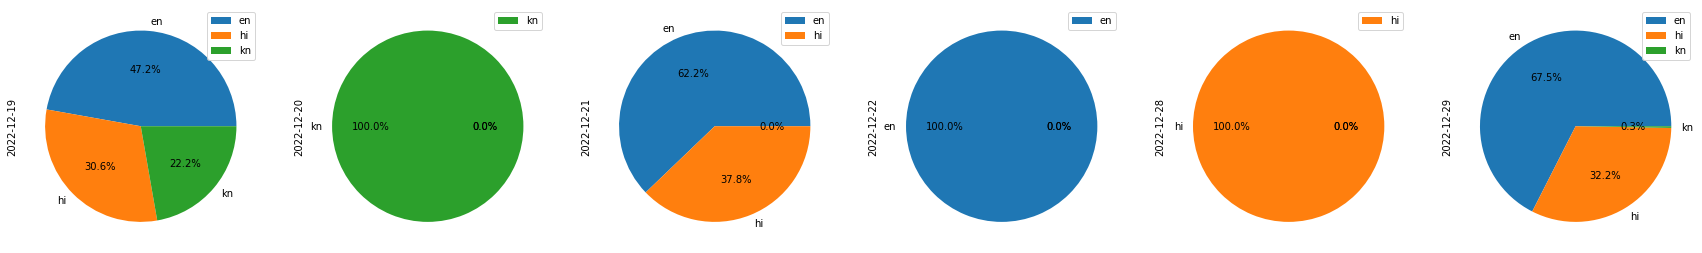

In [266]:
camp_sms_delivery_df[camp_sms_delivery_df["Status"] != "Delivered"].groupby(["Delivered Date","SMS Language"]).size().unstack(0).plot(kind = "pie", figsize= (30,30),subplots=True,autopct = "%1.1f%%")

In [7]:
# camp_sms_delivery_df['Delivered Year'] = camp_sms_delivery_df['Delivered Date'].apply(lambda x: x.split('-')[0])
# camp_sms_delivery_df['Delivered Month'] = camp_sms_delivery_df['Delivered Date'].apply(lambda x: x.split('-')[1])
# camp_sms_delivery_df['Delivered Day'] = camp_sms_delivery_df['Delivered Date'].apply(lambda x: x.split('-')[2])

In [136]:
data_7 = camp_sms_delivery_df.groupby(["Hour of Day","SMS Language","Status"]).size().unstack(level=2)

In [ ]:
# df_gb = df.groupby(['year', 'month', 'class']).size().unstack(level=2)
data_7.plot(kind = "bar", figsize= (20,10))
# data_7

In [140]:
# import seaborn as sns

In [139]:
# plt.figure(figsize=(20, 10))
# sns.countplot(data=camp_sms_delivery_df, x=['Hour of Day','SMS Language'], hue='Status')

In [11]:
camp_sms_click_df = camp_sms_click_df[camp_sms_click_df["Delivered Time"] != "-"]

In [12]:
camp_sms_click_df.dropna(inplace = True)
# camp_sms_click_df[camp_sms_click_df["Delivered Time"].isna() == True]

In [13]:
camp_sms_click_df['Delivered Date'] = camp_sms_click_df['Delivered Time'].apply(lambda x: x.split(' ')[0])
camp_sms_click_df['Delivery Time']  = camp_sms_click_df['Delivered Time'].apply(lambda x: x.split(' ')[1])
camp_sms_click_df['Hour of Day'] = camp_sms_click_df['Delivery Time'].apply(lambda x:  x.split(':')[0] )
camp_sms_click_df['Day of Week'] = camp_sms_click_df['Delivered Date'].apply(lambda x: convert_to_day_of_week(x))

camp_sms_click_df['Clicked Date'] = camp_sms_click_df['Clicked time'].apply(lambda x: x.split(' ')[0])
camp_sms_click_df['Click Time']  = camp_sms_click_df['Clicked time'].apply(lambda x: x.split(' ')[1])
camp_sms_click_df['Clicked Hour of Day'] = camp_sms_click_df['Click Time'].apply(lambda x: x.split(':')[0])

In [14]:
camp_sms_dff = pd.merge(camp_sms_click_df, camp_sms_delivery_df, on=['Broadcast ID', 
                                            'Broadcast name',
                                            'Mobile number',
                                            'Primary Key (User_id)',
                                            'Delivered Time',
                                            'Delivered Date','Delivery Time',
                                            'Hour of Day','Day of Week'], how='outer')

In [15]:
df = camp_sms_dff.copy()
df["Circle"] = "Karnataka"

In [274]:
df[(df["Status"] == "Delivered") & (df["Clicked Hour of Day"].isna() == True)].groupby(["Delivered Date","SMS Language"]).size().unstack(0)

Delivered Date,2022-12-19,2022-12-21,2022-12-22,2022-12-28,2022-12-29
SMS Language,,,,,
en,584.0,4985.0,8.0,NaN,356.0
hi,664.0,6128.0,NaN,632.0,476.0
kn,624.0,NaN,NaN,NaN,NaN


array([<AxesSubplot:ylabel='2022-12-19'>,
       <AxesSubplot:ylabel='2022-12-21'>,
       <AxesSubplot:ylabel='2022-12-22'>,
       <AxesSubplot:ylabel='2022-12-28'>,
       <AxesSubplot:ylabel='2022-12-29'>], dtype=object)

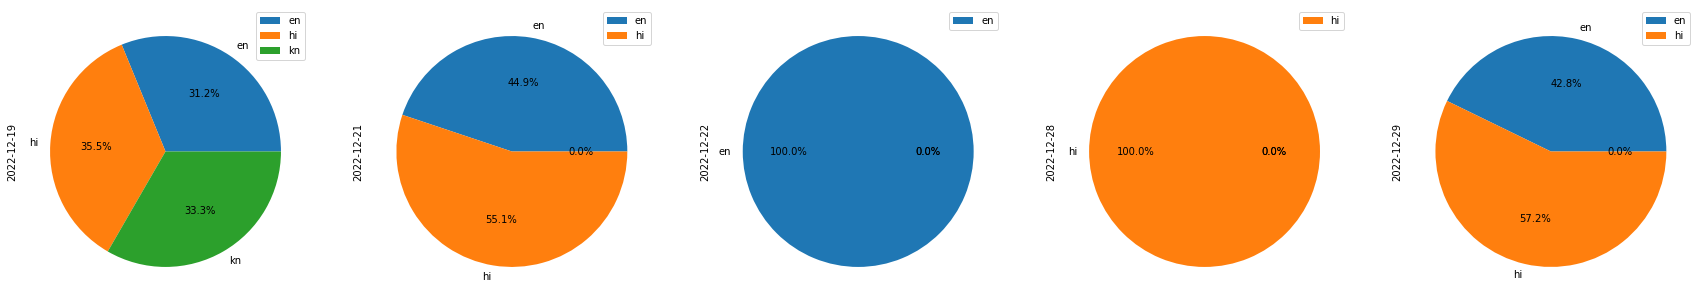

In [273]:
df[(df["Status"] == "Delivered") & (df["Clicked Hour of Day"].isna() == True)].groupby(["Delivered Date","SMS Language"]).size().unstack(0).plot(kind = "pie", figsize= (30,30),subplots=True,autopct = "%1.1f%%")

In [269]:
df

,Broadcast ID,Broadcast name,Mobile number,Primary Key (User_id),Link clicked,Delivered Time,Clicked time,Delivered Date,Delivery Time,Hour of Day,Day of Week,Clicked Date,Click Time,Clicked Hour of Day,Message,Published date,Status,Remark,Operator,Circle,SMS Language,SMS Length,Timelag (s),Num SMS Sent,Cost of All SMS Sent,Num words in SMS,Day of Month
0,5770.0,Tie Up Vinolya English 2912,8.050096e+09,VINOLYA567,https://mshblf.page.link/EGF4,2022-12-29 15:02:11,2022-12-29 15:06:25,2022-12-29,15:02:11,15,Thursday,2022-12-29,15:06:25,15,"Dear Customer, Congratulations! As an employee...",NaN,Delivered,Delivered,Vodafone,Karnataka,en,240,254.0,2.0,0.26,34,29
1,5770.0,Tie Up Vinolya English 2912,9.844204e+09,VINOLYA270,https://mshblf.page.link/EGF4,2022-12-29 15:02:12,2022-12-29 15:02:15,2022-12-29,15:02:12,15,Thursday,2022-12-29,15:02:15,15,"Dear Customer, Congratulations! As an employee...",NaN,Delivered,Delivered,Airtel,Karnataka,en,240,3.0,2.0,0.26,34,29
2,5770.0,Tie Up Vinolya English 2912,9.164029e+09,VINOLYA6,https://mshblf.page.link/EGF4,2022-12-29 15:02:11,2022-12-29 15:03:13,2022-12-29,15:02:11,15,Thursday,2022-12-29,15:03:13,15,"Dear Customer, Congratulations! As an employee...",NaN,Delivered,Delivered,Vodafone,Karnataka,en,240,62.0,2.0,0.26,34,29
3,5770.0,Tie Up Vinolya English 2912,9.141074e+09,VINOLYA342,https://mshblf.page.link/EGF4,2022-12-29 15:02:13,2022-12-29 15:02:19,2022-12-29,15:02:13,15,Thursday,2022-12-29,15:02:19,15,"Dear Customer, Congratulations! As an employee...",NaN,Delivered,Delivered,Airtel,Karnataka,en,240,6.0,2.0,0.26,34,29
4,5770.0,Tie Up Vinolya English 2912,9.739651e+09,VINOLYA7,https://mshblf.page.link/EGF4,2022-12-29 15:02:11,2022-12-29 15:02:15,2022-12-29,15:02:11,15,Thursday,2022-12-29,15:02:15,15,"Dear Customer, Congratulations! As an employee...",NaN,Delivered,Delivered,Vodafone,Karnataka,en,240,4.0,2.0,0.26,34,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20845,5739.0,Tie Up Uniservice Apartment Sol English 0212,9.901983e+09,RBH309,NaN,2022-12-19 16:02:12,NaN,2022-12-19,16:02:12,16,Monday,NaN,NaN,NaN,"Dear Customer, Congratulations! As an employee...",NaN,not sent,number on DND,Vodafone,Karnataka,en,240,NaN,2.0,0.26,34,19
20846,5739.0,Tie Up Uniservice Apartment Sol English 0212,7.795185e+09,RBH375,NaN,2022-12-19 16:12:36,NaN,2022-12-19,16:12:36,16,Monday,NaN,NaN,NaN,"Dear Customer, Congratulations! As an employee...",NaN,Delivered,Delivered,Airtel,Karnataka,en,240,NaN,2.0,0.26,34,19
20847,5739.0,Tie Up Uniservice Apartment Sol English 0212,7.348889e+09,RBH393,NaN,2022-12-19 16:12:35,NaN,2022-12-19,16:12:35,16,Monday,NaN,NaN,NaN,"Dear Customer, Congratulations! As an employee...",NaN,Delivered,Delivered,Unitech Infrastructures,Karnataka,en,240,NaN,2.0,0.26,34,19
20848,5739.0,Tie Up Uniservice Apartment Sol English 0212,8.778190e+09,RBH326,NaN,2022-12-19 16:12:35,NaN,2022-12-19,16:12:35,16,Monday,NaN,NaN,NaN,"Dear Customer, Congratulations! As an employee...",NaN,Delivered,Delivered,Airtel,Karnataka,en,240,NaN,2.0,0.26,34,19


In [222]:
# df[["Hour of Day"]] = df[["Hour of Day"]].astype("int")

In [224]:
# df.plot(kind = "pie", y = "Hour of Day" ,autopct = lambda p: format(p, '.1f') if p > 2 else None )

In [78]:
df[df["Clicked Hour of Day"].isna() == False].groupby(["SMS Language","Day of Week"]).count()["Message"]

SMS Language  Day of Week
en            Monday          53
              Thursday        10
              Wednesday      532
hi            Monday          47
              Thursday        16
              Wednesday      645
kn            Monday          86
Name: Message, dtype: int64

In [20]:
import matplotlib.pyplot as plt

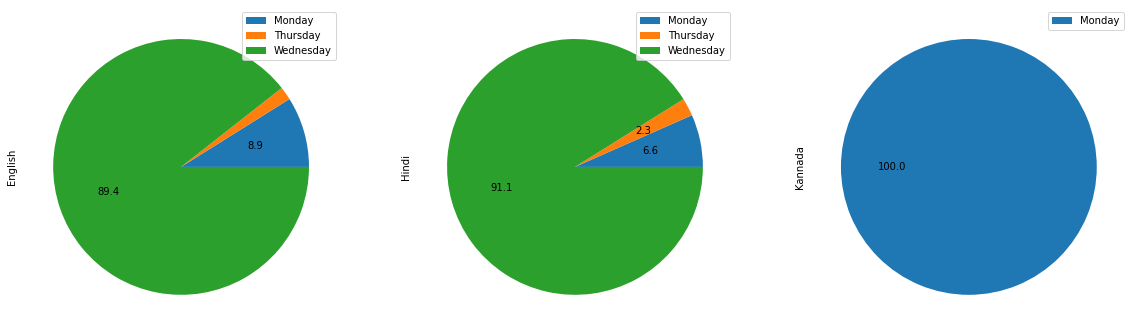

In [21]:
lanuguage_clicked_day_wise_day = df[df["Clicked Hour of Day"].isna() == False][["Day of Week","SMS Language","Hour of Day"]].groupby(["SMS Language","Day of Week"]).count()


plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
plt.pie(lanuguage_clicked_day_wise_day.loc["en",:].reset_index()["Hour of Day"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lanuguage_clicked_day_wise_day.loc["en",:].reset_index()["Day of Week"])
plt.ylabel("English")

plt.subplot(3,3,2)
plt.pie(lanuguage_clicked_day_wise_day.loc["hi",:].reset_index()["Hour of Day"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lanuguage_clicked_day_wise_day.loc["hi",:].reset_index()["Day of Week"])
plt.ylabel("Hindi")

plt.subplot(3,3,3)
plt.pie(lanuguage_clicked_day_wise_day.loc["kn",:].reset_index()["Hour of Day"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lanuguage_clicked_day_wise_day.loc["kn",:].reset_index()["Day of Week"])
plt.ylabel("Kannada")

plt.show()

<AxesSubplot:ylabel='Clicked Hour of Day'>

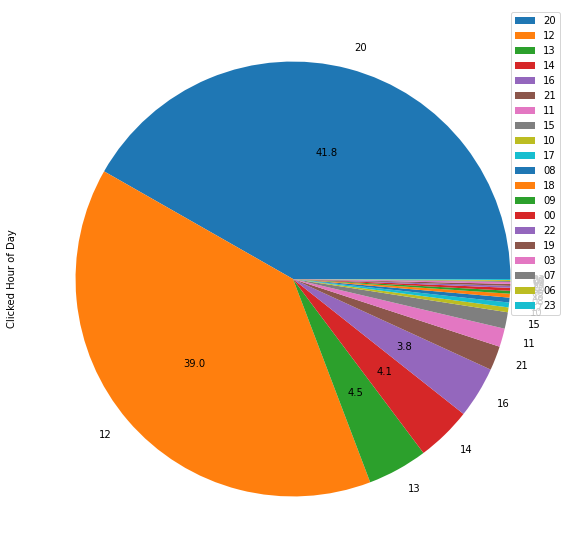

In [228]:
df["Clicked Hour of Day"].value_counts().plot(kind="pie",autopct = lambda p: format(p, '.1f') if p > 2 else None,figsize= (10,10),legend= True)
# df["Clicked Hour of Day"].value_counts().

<AxesSubplot:ylabel='Clicked Hour of Day'>

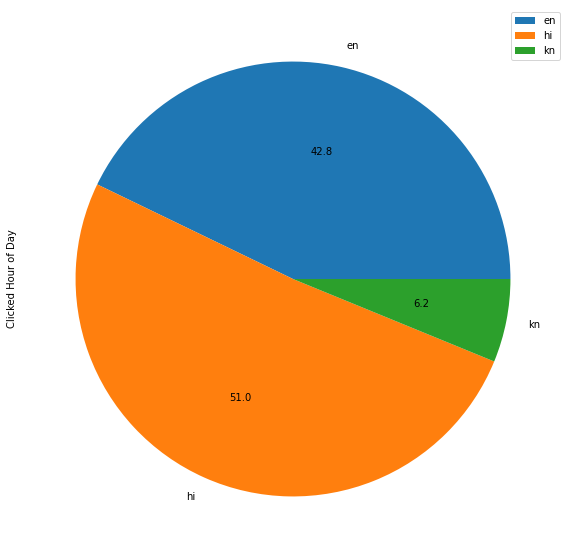

In [237]:
df[["Clicked Hour of Day","SMS Language"]].groupby("SMS Language").count().plot(kind="pie",autopct = lambda p: format(p, '.1f') if p > 2 else None,figsize= (10,10),legend= True, y = "Clicked Hour of Day")

<AxesSubplot:ylabel='Hour of Day'>

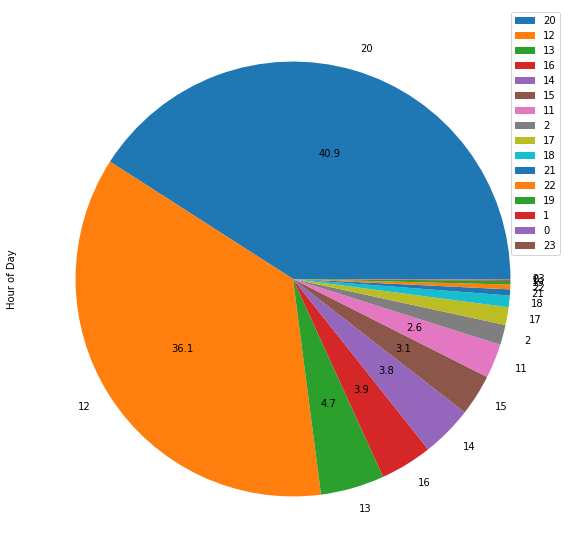

In [239]:
df["Hour of Day"].value_counts().plot(kind="pie",autopct = lambda p: format(p, '.1f') if p > 2 else None,figsize= (10,10),legend= True)
# delivery_hr_data["Hour of Day"] 

# df["Hour of Day"].value_counts().plot(kind="pie",autopct = "%1.1f%%",figsize= (10,10))

In [263]:
import matplotlib.pyplot as plt

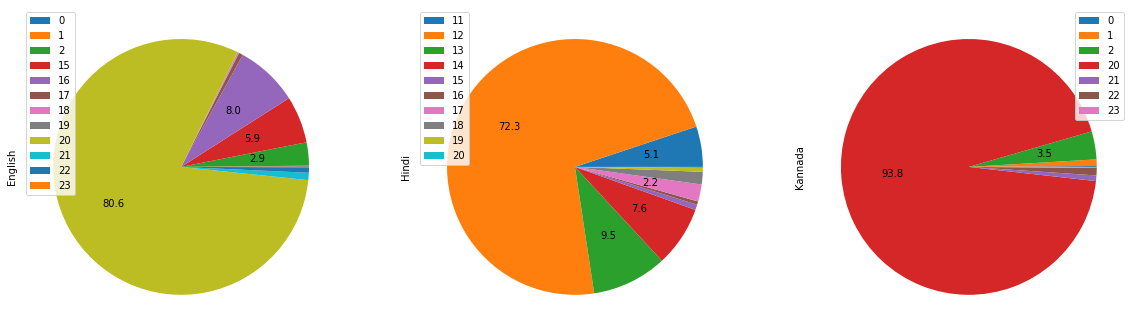

In [279]:
lang_per_hr_of_day = df[["Hour of Day","SMS Language","Day of Week"]].groupby(["SMS Language","Hour of Day"]).count() 

plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
plt.pie(lang_per_hr_of_day.loc["en",:].reset_index()["Day of Week"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lang_per_hr_of_day.loc["en",:].reset_index()["Hour of Day"])
plt.ylabel("English")

plt.subplot(3,3,2)
plt.pie(lang_per_hr_of_day.loc["hi",:].reset_index()["Day of Week"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lang_per_hr_of_day.loc["hi",:].reset_index()["Hour of Day"])
plt.ylabel("Hindi")

plt.subplot(3,3,3)
plt.pie(lang_per_hr_of_day.loc["kn",:].reset_index()["Day of Week"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lang_per_hr_of_day.loc["kn",:].reset_index()["Hour of Day"])
plt.ylabel("Kannada")
plt.show()


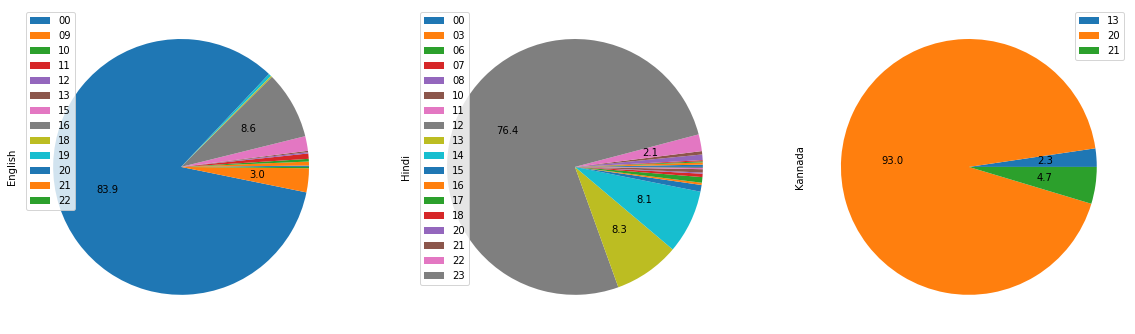

In [285]:
lang_per_hr_of_day = df[["Clicked Hour of Day","SMS Language","Day of Week"]].groupby(["SMS Language","Clicked Hour of Day"]).count() 
# lang_per_hr_of_day.loc["en",:].reset_index()

plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
plt.pie(lang_per_hr_of_day.loc["en",:].reset_index()["Day of Week"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lang_per_hr_of_day.loc["en",:].reset_index()["Clicked Hour of Day"])
plt.ylabel("English")

plt.subplot(3,3,2)
plt.pie(lang_per_hr_of_day.loc["hi",:].reset_index()["Day of Week"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lang_per_hr_of_day.loc["hi",:].reset_index()["Clicked Hour of Day"])
plt.ylabel("Hindi")

plt.subplot(3,3,3)
plt.pie(lang_per_hr_of_day.loc["kn",:].reset_index()["Day of Week"], autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(labels=lang_per_hr_of_day.loc["kn",:].reset_index()["Clicked Hour of Day"])
plt.ylabel("Kannada")

plt.show()


<AxesSubplot:ylabel='Day of Week'>

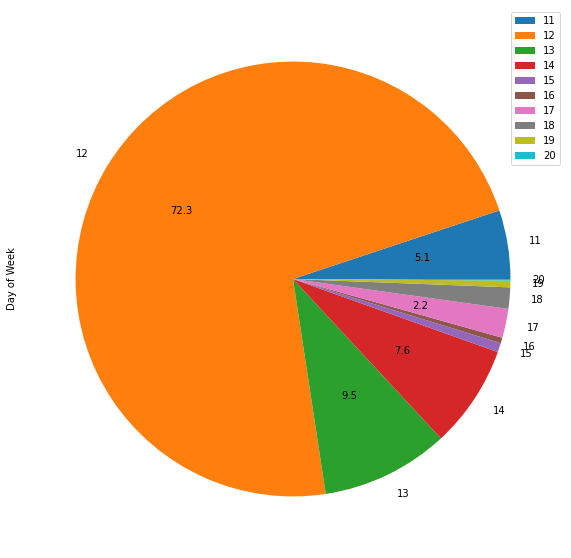

In [258]:
df[["Hour of Day","SMS Language","Day of Week"]].groupby(["SMS Language","Hour of Day"]).count().loc["hi",:].plot(kind="pie",autopct = lambda p: format(p, '.1f') if p > 2 else None,figsize= (10,10),legend= True,y = "Day of Week")

<AxesSubplot:ylabel='Day of Week'>

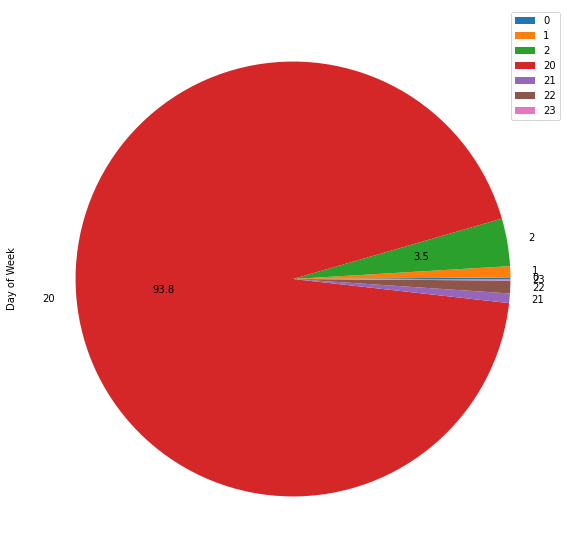

In [259]:
df[["Hour of Day","SMS Language","Day of Week"]].groupby(["SMS Language","Hour of Day"]).count().loc["kn",:].plot(kind="pie",autopct = lambda p: format(p, '.1f') if p > 2 else None,figsize= (10,10),legend= True,y = "Day of Week")

In [203]:
# df["SMS Language"].value_counts().plot(kind="pie",autopct = "%1.1f%%",figsize= (10,10))

In [15]:
# df = camp_sms_dff[camp_sms_dff['Circle']!='-']
# df = df[df['Operator']!='-']

In [24]:
df['SMS Length'] = df['Message'].apply(lambda x: len(x) if x==x else np.nan)

In [25]:
df.shape, camp_sms_dff.shape

((20850, 22), (20850, 21))

In [27]:
import time
from datetime import datetime
from dateutil import parser

def func_UTCToEpoch(utcData, timestampFormat=None):
    if timestampFormat == None:
        dateObj    = parser.parse(utcData)
        epochValue = dateObj.timestamp()
    else:
        timeTuple  = time.strptime(utcData, timestampFormat)
        epochValue = time.mktime(timeTuple)
    return (epochValue)

In [28]:
import dateutil.relativedelta

def calculate_timelag(delv_time, click_time):
    
    if click_time == click_time:
        delv_time_ts = datetime.fromtimestamp(func_UTCToEpoch(delv_time))
        click_time_ts = datetime.fromtimestamp(func_UTCToEpoch(click_time))
        diff = click_time_ts - delv_time_ts
        seconds = diff.total_seconds()
    
    else:
        seconds = np.nan
    
    return seconds

In [29]:
df['Timelag (s)'] = df.apply(lambda x: calculate_timelag(x['Delivered Time'], x['Clicked time']), axis=1)

In [30]:
df = df[~(df['Timelag (s)'] < -10)]

In [31]:
df['Timelag (s)'] = df['Timelag (s)'].apply(lambda x: abs(x) if x==x else np.nan)

/tmp/ipykernel_28768/3215434372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timelag (s)'] = df['Timelag (s)'].apply(lambda x: abs(x) if x==x else np.nan)


In [32]:
#df['SMS Length'] = len(df['Message'])
df['Num SMS Sent'] = np.ceil(df['SMS Length']/160)
df['Cost of All SMS Sent'] = 0.13 * df['Num SMS Sent'] #  cost_of_sms

/tmp/ipykernel_28768/753335674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num SMS Sent'] = np.ceil(df['SMS Length']/160)
/tmp/ipykernel_28768/753335674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cost of All SMS Sent'] = 0.13 * df['Num SMS Sent'] #  cost_of_sms


In [33]:
df['Num words in SMS'] = df['Message'].apply(lambda x: len(x.split(' ')))

/tmp/ipykernel_28768/1958596630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num words in SMS'] = df['Message'].apply(lambda x: len(x.split(' ')))


In [34]:
def convert_to_day_of_month(date_str):
    try:
        day_of_mon = datetime.fromtimestamp(func_UTCToEpoch(date_str)).day
    except:
        day_of_mon = np.nan
    return day_of_mon

In [35]:
df['Day of Month'] = df['Delivered Date'].apply(convert_to_day_of_month)

/tmp/ipykernel_28768/1511225747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day of Month'] = df['Delivered Date'].apply(convert_to_day_of_month)


In [36]:
def mean_wo_0(x):
    x_upd = [i for i in x.values if i!=0]
    mean = np.nanmean(x_upd)
    return mean

def median_wo_0(x):
    x_upd = [i for i in x.values if i!=0]
    median = np.nanmedian(x_upd)
    return median

In [37]:
timelag = pd.DataFrame(df.groupby(by = ['Circle', 
                                        'SMS Language',
                                        'Day of Week',
                                        'Hour of Day'])['Timelag (s)'].agg([np.mean, np.median, mean_wo_0, median_wo_0]))
timelag.rename(columns= {'mean': 'Avg Timelag (s)',
                        'median': 'Median Timelag (s)',
                         'mean_wo_0': 'Avg Timelag (s) wo 0',
                        'median_wo_0': 'Median Timelag (s) wo 0',
                        }, inplace=True)

/tmp/ipykernel_28768/3554248693.py:3: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(x_upd)
/home/aamin/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [38]:
num_sms = pd.DataFrame(df.groupby(by = ['Circle', 
                                        'SMS Language',
                                        'Day of Week',
                                        'Hour of Day'])['Num SMS Sent'].agg([np.mean, np.median, mean_wo_0, median_wo_0]))
num_sms.rename(columns= {'mean': 'Avg Num SMS Sent',
                        'median': 'Median Num SMS Sent',
                        'mean_wo_0': 'Avg Num SMS Sent wo 0',
                        'median_wo_0': 'Median Num SMS Sent wo 0',
                        }, inplace=True)

In [39]:
cost_sms = pd.DataFrame(df.groupby(by = ['Circle', 
                                        'SMS Language',
                                        'Day of Week',
                                        'Hour of Day'])['Cost of All SMS Sent'].agg([np.mean, np.median, mean_wo_0, median_wo_0]))
cost_sms.rename(columns= {'mean': 'Avg Cost of All SMS Sent',
                        'median': 'Median Cost of All SMS Sent',
                         'mean_wo_0': 'Avg Cost of All SMS Sent wo 0',
                        'median_wo_0': 'Median Cost of All SMS Sent wo 0'}, inplace=True)

In [40]:
len_sms = pd.DataFrame(df.groupby(by = ['Circle', 
                                        'SMS Language',
                                        'Day of Week',
                                        'Hour of Day'])['SMS Length'].agg([np.mean, np.median, mean_wo_0, median_wo_0]))
len_sms.rename(columns= {'mean': 'Avg SMS Length',
                        'median': 'Median SMS Length',
                        'mean_wo_0': 'Avg SMS Length wo 0',
                        'median_wo_0': 'Median SMS Length wo 0'}, inplace=True)

In [41]:
day_of_mon = pd.DataFrame(df.groupby(by = ['Circle', 
                                        'SMS Language',
                                        'Day of Week',
                                        'Hour of Day'])['Day of Month'].agg([np.mean, np.median, mean_wo_0, median_wo_0]))
day_of_mon.rename(columns= {'mean': 'Avg Day of Month',
                        'median': 'Median Day of Month',
                           'mean_wo_0': 'Avg Day of Month wo 0',
                        'median_wo_0': 'Median Day of Month wo 0'}, inplace=True)

In [42]:
num_words = pd.DataFrame(df.groupby(by = ['Circle', 
                                        'SMS Language',
                                        'Day of Week',
                                        'Hour of Day'])['Num words in SMS'].agg([np.mean, np.median, mean_wo_0, median_wo_0]))
num_words.rename(columns= {'mean': 'Avg Num Words',
                        'median': 'Median Num Words',
                          'mean_wo_0': 'Avg Num Words wo 0',
                        'median_wo_0': 'Median Num Words wo 0'}, inplace=True)

In [43]:
new_features = pd.merge(num_sms,cost_sms, how= 'outer', 
               on = ['Circle',
                     'SMS Language',
                     'Day of Week','Hour of Day'])

new_features = pd.merge(new_features,len_sms, how= 'outer', 
               on = ['Circle',
                     'SMS Language',
                     'Day of Week','Hour of Day'])

new_features = pd.merge(new_features,timelag, how= 'outer', 
               on = ['Circle',
                     'SMS Language',
                     'Day of Week','Hour of Day'])

new_features = pd.merge(new_features,day_of_mon, how= 'outer', 
               on = ['Circle',
                     'SMS Language',
                     'Day of Week','Hour of Day'])

new_features = pd.merge(new_features,num_words, how= 'outer', 
               on = ['Circle',
                     'SMS Language',
                     'Day of Week','Hour of Day'])

In [44]:
new_features.fillna(0, inplace = True)          

In [45]:
new_features

Avg Num SMS Sent  \
Circle    SMS Language Day of Week Hour of Day                     
Karnataka en           Monday      16                        2.0   
                                   17                        2.0   
                                   18                        2.0   
                                   20                        2.0   
                                   21                        2.0   
                                   22                        2.0   
                       Thursday    00                        2.0   
                                   01                        2.0   
                                   02                        2.0   
                                   15                        2.0   
                                   16                        2.0   
                                   17                        2.0   
                                   18                        2.0   
                                   19                        2.0   
                                   20                        2.0   
                                   21                        2.0   
                       Wednesday   20                        2.0   
                                   21                        2.0   
                                   22                        2.0   
                                   23                        2.0   
          hi           Monday      13                        2.0   
                                   14                        2.0   
                                   15                        2.0   
                                   16                        2.0   
                                   17                        2.0   
                                   18                        2.0   
                                   19                        2.0   
                       Thursday    11                        2.0   
                                   12                        2.0   
                                   13                        2.0   
                                   14                        2.0   
                                   15                        2.0   
                                   16                        2.0   
                                   17                        2.0   
                       Wednesday   12                        2.0   
                                   13                        2.0   
                                   14                        2.0   
                                   15                        2.0   
                                   16                        2.0   
                                   17                        2.0   
                                   18                        2.0   
                                   19                        2.0   
                                   20                        2.0   
          kn           Monday      20                        2.0   
                                   21                        2.0   
                                   22                        2.0   
                                   23                        2.0   
                       Thursday    20                        2.0   
                       Tuesday     00                        2.0   
                                   01                        2.0   
                                   02                        2.0   

                                                Median Num SMS Sent  \
Circle    SMS Language Day of Week Hour of Day                        
Karnataka en           Monday      16                           2.0   
                                   17                           2.0   
                                   18                           2.0   
                                   20                           2.0   
                 

In [46]:
circle_df = pd.DataFrame(df.groupby(by = ['Circle', 
                                          #'Operator',
                                        'SMS Language',
                                          'Day of Week','Hour of Day']).Status.count())
circle_df.rename(columns= {'Status': 'sms_sent'}, inplace=True)
circle_df

sms_sent
Circle    SMS Language Day of Week Hour of Day          
Karnataka en           Monday      16                760
                                   17                 45
                                   18                 14
                                   20                  2
                                   21                  4
                                   22                 22
                       Thursday    00                  9
                                   01                  6
                                   02                281
                                   15                569
                                   16                  3
                                   17                  5
                                   18                  1
                                   19                  5
                                   20                  3
                                   21                 21
                       Wednesday   20               7721
                                   21                 63
                                   22                 44
                                   23                  4
          hi           Monday      13                793
                                   14                  4
                                   15                  8
                                   16                  3
                                   17                  3
                                   18                 10
                                   19                 26
                       Thursday    11                532
                                   12                 26
                                   13                  6
                                   14                  2
                                   15                  2
                                   16                 15
                                   17                 24
                       Wednesday   12               7507
                                   13                191
                                   14                790
                                   15                 61
                                   16                 25
                                   17                198
                                   18                155
                                   19                 26
                                   20                 12
          kn           Monday      20                794
                                   21                  6
                                   22                  8
                                   23                  1
                       Thursday    20                  1
                       Tuesday     00                  1
                                   01                  7
                                   02                 30

In [47]:
circle_delv= pd.DataFrame(df[df['Status']=='Delivered'].groupby(by = ['Circle',
                                                                      'SMS Language',
                                                                      'Day of Week','Hour of Day']).Status.count())
circle_delv.rename(columns= {'Status': 'sms_delivered'}, inplace=True)
circle_delv

sms_delivered
Circle    SMS Language Day of Week Hour of Day               
Karnataka en           Monday      16                     623
                                   17                       7
                                   18                       2
                                   20                       2
                                   21                       3
                       Thursday    00                       7
                                   01                       1
                                   15                     358
                                   16                       1
                                   18                       1
                                   19                       5
                                   20                       1
                       Wednesday   20                    5462
                                   21                      40
                                   22                      12
                                   23                       3
          hi           Monday      13                     696
                                   14                       3
                                   15                       1
                                   16                       3
                                   17                       3
                                   18                       4
                                   19                       1
                       Thursday    11                     473
                                   12                       6
                                   13                       3
                                   15                       2
                                   16                       8
                       Wednesday   12                    6582
                                   13                      49
                                   14                     707
                                   15                      16
                                   16                      14
                                   17                      32
                                   18                       2
                                   19                       3
          kn           Monday      20                     703
                                   21                       4
                                   22                       2
                                   23                       1

In [48]:
circle_delv_rate_df = pd.merge(circle_df,circle_delv, how= 'outer', 
               on = ['Circle','SMS Language',
                     'Day of Week','Hour of Day'])

In [49]:
circle_delv_rate_df = pd.merge(circle_df,circle_delv, how= 'outer', 
               on = ['Circle','SMS Language',
                     'Day of Week','Hour of Day'])

In [50]:
circle_delv_rate_df.fillna(0, inplace = True)
circle_delv_rate_df['delivery_rate'] = circle_delv_rate_df['sms_delivered']*100 / circle_delv_rate_df['sms_sent']
circle_delv_rate_df

sms_sent  sms_delivered  \
Circle    SMS Language Day of Week Hour of Day                            
Karnataka en           Monday      16                760          623.0   
                                   17                 45            7.0   
                                   18                 14            2.0   
                                   20                  2            2.0   
                                   21                  4            3.0   
                                   22                 22            0.0   
                       Thursday    00                  9            7.0   
                                   01                  6            1.0   
                                   02                281            0.0   
                                   15                569          358.0   
                                   16                  3            1.0   
                                   17                  5            0.0   
                                   18                  1            1.0   
                                   19                  5            5.0   
                                   20                  3            1.0   
                                   21                 21            0.0   
                       Wednesday   20               7721         5462.0   
                                   21                 63           40.0   
                                   22                 44           12.0   
                                   23                  4            3.0   
          hi           Monday      13                793          696.0   
                                   14                  4            3.0   
                                   15                  8            1.0   
                                   16                  3            3.0   
                                   17                  3            3.0   
                                   18                 10            4.0   
                                   19                 26            1.0   
                       Thursday    11                532          473.0   
                                   12                 26            6.0   
                                   13                  6            3.0   
                                   14                  2            0.0   
                                   15                  2            2.0   
                                   16                 15            8.0   
                                   17                 24            0.0   
                       Wednesday   12               7507         6582.0   
                                   13                191           49.0   
                                   14                790          707.0   
                                   15                 61           16.0   
                                   16                 25           14.0   
                                   17                198           32.0   
                                   18                155            2.0   
                                   19                 26            3.0   
                                   20                 12            0.0   
          kn           Monday      20                794          703.0   
                                   21                  6            4.0   
                                   22                  8            2.0   
                                   23                  1            1.0   
                       Thursday    20                  1            0.0   
                       Tuesday     00                  1            0.0   
                                   01                  7            0.0   
                                   02                 30            0.0   

                                                delivery_rate  
Circle  

In [51]:
click= pd.DataFrame(df[df['Clicked Date']==df['Clicked Date']].groupby(by = ['Circle', 'SMS Language',
                                                                                           'Day of Week','Hour of Day']
                                                                                    ).Status.count())
click.rename(columns= {'Status': 'sms_clicked'}, inplace=True)
click

sms_clicked
Circle    SMS Language Day of Week Hour of Day             
Karnataka en           Monday      16                    53
                       Thursday    15                    10
                       Wednesday   20                   528
                                   21                     4
          hi           Monday      13                    47
                       Thursday    11                    15
                                   12                     1
                       Wednesday   12                   585
                                   13                     1
                                   14                    54
                                   15                     1
                                   16                     1
                                   17                     3
          kn           Monday      20                    84
                                   21                     2

In [264]:
click_rate_df = pd.merge(circle_delv_rate_df,click, how= 'outer', 
                         on = ['Circle','SMS Language','Day of Week','Hour of Day'])
click_rate_df.fillna(0, inplace = True)
click_rate_df['clicked_rate'] = click_rate_df['sms_clicked']*100 / click_rate_df['sms_delivered']
click_rate_df.fillna(0, inplace = True)
click_rate_df

sms_sent  sms_delivered  \
Circle    SMS Language Day of Week Hour of Day                            
Karnataka en           Monday      16                760          623.0   
                                   17                 45            7.0   
                                   18                 14            2.0   
                                   20                  2            2.0   
                                   21                  4            3.0   
                                   22                 22            0.0   
                       Thursday    00                  9            7.0   
                                   01                  6            1.0   
                                   02                281            0.0   
                                   15                569          358.0   
                                   16                  3            1.0   
                                   17                  5            0.0   
                                   18                  1            1.0   
                                   19                  5            5.0   
                                   20                  3            1.0   
                                   21                 21            0.0   
                       Wednesday   20               7721         5462.0   
                                   21                 63           40.0   
                                   22                 44           12.0   
                                   23                  4            3.0   
          hi           Monday      13                793          696.0   
                                   14                  4            3.0   
                                   15                  8            1.0   
                                   16                  3            3.0   
                                   17                  3            3.0   
                                   18                 10            4.0   
                                   19                 26            1.0   
                       Thursday    11                532          473.0   
                                   12                 26            6.0   
                                   13                  6            3.0   
                                   14                  2            0.0   
                                   15                  2            2.0   
                                   16                 15            8.0   
                                   17                 24            0.0   
                       Wednesday   12               7507         6582.0   
                                   13                191           49.0   
                                   14                790          707.0   
                                   15                 61           16.0   
                                   16                 25           14.0   
                                   17                198           32.0   
                                   18                155            2.0   
                                   19                 26            3.0   
                                   20                 12            0.0   
          kn           Monday      20                794          703.0   
                                   21                  6            4.0   
                                   22                  8            2.0   
                                   23                  1            1.0   
                       Thursday    20                  1            0.0   
                       Tuesday     00                  1            0.0   
                                   01                  7            0.0   
                                   02                 30            0.0   

                                                delivery_rate  sms_click

In [ ]:
# new_clicked_rate_dff = click_rate_df[["clicked_rate","delivery_rate"]].unstack(level= 2).loc["Karnataka","en",:]["clicked_rate"].fillna(0)
# new_clicked_rate_dff

In [236]:
# vals = click_rate_df[["clicked_rate","delivery_rate"]].reset_index()
# vals.groupby(["SMS Language","Day of Week","Hour of Day"]).size()

In [ ]:
# fig, ax = plt.subplots(figsize = (10,10))

# size = 0.2
# vals = click_rate_df[["clicked_rate","delivery_rate"]].reset_index()

# cmap = plt.colormaps["tab20c"]
# outer_colors = cmap(np.arange(5)*4)
# inner_colors = cmap([1, 2, 5, 6, 9, 10,11])
# inner_colors_2 = cmap([3,4,7,8,12,13,14,15,16,17,18,19,20])


# ax.pie(vals["SMS Language"].value_counts(), radius=3, colors=outer_colors,labels= vals["SMS Language"].unique().tolist() , 
#        wedgeprops=dict(width=size, edgecolor='w'))

# ax.pie(vals.groupby(["SMS Language","Day of Week"]).size().values, radius=3-size, colors=inner_colors,
#        labels= vals.groupby(["SMS Language","Day of Week"]).size().index.get_level_values(1), 
#        wedgeprops=dict(width=size, edgecolor='w'))

# ax.pie(vals.groupby(["SMS Language","Day of Week","Hour of Day"]).size().values, radius=3-size-size, colors=inner_colors_2,
#        labels= vals.groupby(["SMS Language","Day of Week","Hour of Day"]).size().index.get_level_values(2), 
#        wedgeprops=dict(width=size, edgecolor='w'))

# # ax.pie(vals["clicked_rate"].value_counts(), radius=3-size-size-size, colors=inner_colors,labels= vals["clicked_rate"].unique().tolist(), 
# #        wedgeprops=dict(width=size, edgecolor='w'))

# ax.set(aspect="equal", title='Pie plot with `ax.pie`')
# plt.show()


In [180]:
# click_rate_df.loc["Karnataka","en",:,:]#.plot(kind = "bar",y = ["delivery_rate","clicked_rate"],figsize = (20,10))

In [179]:
#click_rate_df.loc["Karnataka",:,:,:].plot(kind = "bar",y = ["delivery_rate","clicked_rate"],figsize = (30,10)) #x = click_rate_df.loc["Karnataka","en",:,:].index.tolist())
# click_rate_df.loc["Karnataka","en","Monday",:].plot(kind = "pie",y = "sms_delivered", autopct = lambda p: format(p, '.1f') if p > 2 else None, subplots = (3,1,2))
# click_rate_df.loc["Karnataka","en","Monday",:].plot(kind = "pie",y = "sms_clicked", autopct = lambda p: format(p, '.1f') if p > 2 else None, subplots = (3,1,3))

In [181]:
# click_rate_df.loc["Karnataka","en",:,:]

In [200]:
# click_rate_df.loc["Karnataka",:,"Monday",:].plot(kind = "pie",subplots = True,figsize = (20,20),autopct = lambda p: format(p, '.1f') if p > 2 else None)

In [201]:
# click_rate_df.loc["Karnataka",:,"Monday",:].reset_index().groupby("SMS Language").sum().plot(kind = "pie",subplots = True,figsize = (20,20),autopct = lambda p: format(p, '.1f') if p > 2 else None)

In [202]:
# click_rate_df.loc["Karnataka","en","Monday",:].plot(kind = "pie",y = 'sms_sent')

In [47]:
final_df = pd.merge(click_rate_df,new_features, how= 'outer', 
               on = ['Circle',
                     'SMS Language',
                     'Day of Week','Hour of Day'])

In [48]:
final_df = final_df.reset_index()

In [49]:
final_df

,Circle,SMS Language,Day of Week,Hour of Day,sms_sent,sms_delivered,delivery_rate,sms_clicked,clicked_rate,Avg Num SMS Sent,Median Num SMS Sent,Avg Num SMS Sent wo 0,Median Num SMS Sent wo 0,Avg Cost of All SMS Sent,Median Cost of All SMS Sent,Avg Cost of All SMS Sent wo 0,Median Cost of All SMS Sent wo 0,Avg SMS Length,Median SMS Length,Avg SMS Length wo 0,Median SMS Length wo 0,Avg Timelag (s),Median Timelag (s),Avg Timelag (s) wo 0,Median Timelag (s) wo 0,Avg Day of Month,Median Day of Month,Avg Day of Month wo 0,Median Day of Month wo 0,Avg Num Words,Median Num Words,Avg Num Words wo 0,Median Num Words wo 0
0,Karnataka,en,Monday,16,760,623.0,81.973684,53.0,8.507223,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,1736.547170,4.0,1736.547170,4.0,19.000000,19,19.000000,19,34,34,34,34
1,Karnataka,en,Monday,17,45,7.0,15.555556,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34
2,Karnataka,en,Monday,18,14,2.0,14.285714,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34
3,Karnataka,en,Monday,20,2,2.0,100.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34
4,Karnataka,en,Monday,21,4,3.0,75.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34
5,Karnataka,en,Monday,22,22,0.0,0.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34
6,Karnataka,en,Thursday,00,9,7.0,77.777778,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,22.000000,22,22.000000,22,34,34,34,34
7,Karnataka,en,Thursday,01,6,1.0,16.666667,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,22.000000,22,22.000000,22,34,34,34,34
8,Karnataka,en,Thursday,02,281,0.0,0.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,22.000000,22,22.000000,22,34,34,34,34
9,Karnataka,en,Thursday,15,569,358.0,62.917399,10.0,2.793296,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,36.600000,4.5,36.600000,4.5,29.000000,29,29.000000,29,34,34,34,34


In [51]:
final_df['SN'] = np.arange(0,51).tolist()

In [52]:
final_df

,Circle,SMS Language,Day of Week,Hour of Day,sms_sent,sms_delivered,delivery_rate,sms_clicked,clicked_rate,Avg Num SMS Sent,Median Num SMS Sent,Avg Num SMS Sent wo 0,Median Num SMS Sent wo 0,Avg Cost of All SMS Sent,Median Cost of All SMS Sent,Avg Cost of All SMS Sent wo 0,Median Cost of All SMS Sent wo 0,Avg SMS Length,Median SMS Length,Avg SMS Length wo 0,Median SMS Length wo 0,Avg Timelag (s),Median Timelag (s),Avg Timelag (s) wo 0,Median Timelag (s) wo 0,Avg Day of Month,Median Day of Month,Avg Day of Month wo 0,Median Day of Month wo 0,Avg Num Words,Median Num Words,Avg Num Words wo 0,Median Num Words wo 0,SN
0,Karnataka,en,Monday,16,760,623.0,81.973684,53.0,8.507223,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,1736.547170,4.0,1736.547170,4.0,19.000000,19,19.000000,19,34,34,34,34,0
1,Karnataka,en,Monday,17,45,7.0,15.555556,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34,1
2,Karnataka,en,Monday,18,14,2.0,14.285714,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34,2
3,Karnataka,en,Monday,20,2,2.0,100.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34,3
4,Karnataka,en,Monday,21,4,3.0,75.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34,4
5,Karnataka,en,Monday,22,22,0.0,0.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,19.000000,19,19.000000,19,34,34,34,34,5
6,Karnataka,en,Thursday,00,9,7.0,77.777778,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,22.000000,22,22.000000,22,34,34,34,34,6
7,Karnataka,en,Thursday,01,6,1.0,16.666667,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,22.000000,22,22.000000,22,34,34,34,34,7
8,Karnataka,en,Thursday,02,281,0.0,0.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,0.000000,0.0,0.000000,0.0,22.000000,22,22.000000,22,34,34,34,34,8
9,Karnataka,en,Thursday,15,569,358.0,62.917399,10.0,2.793296,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240,240,240,240,36.600000,4.5,36.600000,4.5,29.000000,29,29.000000,29,34,34,34,34,9


In [ ]:
final_df.to_csv('aggregated_date_of_initutions.csv')

In [ ]:
# df_2 = pd.read_csv("/home/aamin/files/marketing/copy/mkting_cmpgn_data_wo_existing_users.csv")

In [ ]:
# df_2

,Circle,SMS Language,Day of Week,Hour of Day,sms_sent,sms_delivered,delivery_rate,sms_clicked,clicked_rate,Avg Num SMS Sent,Median Num SMS Sent,Avg Num SMS Sent wo 0,Median Num SMS Sent wo 0,Avg Cost of All SMS Sent,Median Cost of All SMS Sent,Avg Cost of All SMS Sent wo 0,Median Cost of All SMS Sent wo 0,Avg SMS Length,Median SMS Length,Avg SMS Length wo 0,Median SMS Length wo 0,Avg Timelag (s),Median Timelag (s),Avg Timelag (s) wo 0,Median Timelag (s) wo 0,Avg Day of Month,Median Day of Month,Avg Day of Month wo 0,Median Day of Month wo 0,Avg Num Words,Median Num Words,Avg Num Words wo 0,Median Num Words wo 0,SN
0,Andhra Pradesh,en,Friday,9,461,438.0,95.010846,77.0,17.579909,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,197.000000,197.0,197.000000,197.0,2497.259740,3.0,2497.259740,3.0,24.000000,24.0,24.000000,24.0,29.000000,29.0,29.000000,29.0,0
1,Andhra Pradesh,en,Friday,10,13919,7784.0,55.923558,780.0,10.020555,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,239.972196,240.0,239.972196,240.0,15765.801282,2.0,19488.629160,2.0,2.014225,2.0,2.014225,2.0,33.996767,34.0,33.996767,34.0,1
2,Andhra Pradesh,en,Friday,11,2238,366.0,16.353887,34.0,9.289617,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,239.961573,240.0,239.961573,240.0,2.794118,2.0,2.968750,2.5,7.080429,2.0,7.080429,2.0,33.995532,34.0,33.995532,34.0,2
3,Andhra Pradesh,en,Friday,12,832,633.0,76.081731,106.0,16.745656,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,264.432692,268.0,264.432692,268.0,7713.801887,25.5,8016.303922,27.0,11.331731,12.0,11.331731,12.0,36.617788,37.0,36.617788,37.0,3
4,Andhra Pradesh,en,Friday,13,12,10.0,83.333333,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.666667,268.0,258.666667,268.0,0.000000,0.0,0.000000,0.0,11.000000,12.0,11.000000,12.0,36.000000,37.0,36.000000,37.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,West Bengal-Andaman Nicobar,mr,Saturday,10,50,47.0,94.000000,3.0,6.382979,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.000000,258.0,258.000000,258.0,44.666667,49.0,44.666667,49.0,13.000000,13.0,13.000000,13.0,34.000000,34.0,34.000000,34.0,2144
2145,West Bengal-Andaman Nicobar,mr,Saturday,11,1,1.0,100.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.000000,258.0,258.000000,258.0,0.000000,0.0,0.000000,0.0,13.000000,13.0,13.000000,13.0,34.000000,34.0,34.000000,34.0,2145
2146,West Bengal-Andaman Nicobar,mr,Saturday,16,1,0.0,0.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.000000,258.0,258.000000,258.0,0.000000,0.0,0.000000,0.0,13.000000,13.0,13.000000,13.0,34.000000,34.0,34.000000,34.0,2146
2147,West Bengal-Andaman Nicobar,mr,Sunday,14,50,47.0,94.000000,3.0,6.382979,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.000000,258.0,258.000000,258.0,5.333333,4.0,5.333333,4.0,14.000000,14.0,14.000000,14.0,34.000000,34.0,34.000000,34.0,2147


In [ ]:
# new_data = pd.concat([final_df,df_2])

In [ ]:
# new_data.drop("SN",axis=1,inplace=True)

In [ ]:
# new_data

,Circle,SMS Language,Day of Week,Hour of Day,sms_sent,sms_delivered,delivery_rate,sms_clicked,clicked_rate,Avg Num SMS Sent,Median Num SMS Sent,Avg Num SMS Sent wo 0,Median Num SMS Sent wo 0,Avg Cost of All SMS Sent,Median Cost of All SMS Sent,Avg Cost of All SMS Sent wo 0,Median Cost of All SMS Sent wo 0,Avg SMS Length,Median SMS Length,Avg SMS Length wo 0,Median SMS Length wo 0,Avg Timelag (s),Median Timelag (s),Avg Timelag (s) wo 0,Median Timelag (s) wo 0,Avg Day of Month,Median Day of Month,Avg Day of Month wo 0,Median Day of Month wo 0,Avg Num Words,Median Num Words,Avg Num Words wo 0,Median Num Words wo 0
0,Andhra Pradesh,en,Friday,02,2,0.0,0.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240.0,240.0,240.0,240.0,0.000000,0.0,0.000000,0.0,25.0,25.0,25.0,25.0,34.0,34.0,34.0,34.0
1,Andhra Pradesh,en,Friday,11,622,225.0,36.173633,22.0,9.777778,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240.0,240.0,240.0,240.0,2.000000,2.0,2.200000,2.0,16.0,16.0,16.0,16.0,34.0,34.0,34.0,34.0
2,Andhra Pradesh,en,Friday,12,36,13.0,36.111111,1.0,7.692308,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240.0,240.0,240.0,240.0,5.000000,5.0,5.000000,5.0,19.0,16.0,19.0,16.0,34.0,34.0,34.0,34.0
3,Andhra Pradesh,en,Friday,13,2,0.0,0.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240.0,240.0,240.0,240.0,0.000000,0.0,0.000000,0.0,16.0,16.0,16.0,16.0,34.0,34.0,34.0,34.0
4,Andhra Pradesh,en,Friday,14,580,245.0,42.241379,29.0,11.836735,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,240.0,240.0,240.0,240.0,23.758621,4.0,23.758621,4.0,18.0,18.0,18.0,18.0,34.0,34.0,34.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,West Bengal-Andaman Nicobar,mr,Saturday,10,50,47.0,94.000000,3.0,6.382979,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.0,258.0,258.0,258.0,44.666667,49.0,44.666667,49.0,13.0,13.0,13.0,13.0,34.0,34.0,34.0,34.0
2145,West Bengal-Andaman Nicobar,mr,Saturday,11,1,1.0,100.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.0,258.0,258.0,258.0,0.000000,0.0,0.000000,0.0,13.0,13.0,13.0,13.0,34.0,34.0,34.0,34.0
2146,West Bengal-Andaman Nicobar,mr,Saturday,16,1,0.0,0.000000,0.0,0.000000,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.0,258.0,258.0,258.0,0.000000,0.0,0.000000,0.0,13.0,13.0,13.0,13.0,34.0,34.0,34.0,34.0
2147,West Bengal-Andaman Nicobar,mr,Sunday,14,50,47.0,94.000000,3.0,6.382979,2.0,2.0,2.0,2.0,0.26,0.26,0.26,0.26,258.0,258.0,258.0,258.0,5.333333,4.0,5.333333,4.0,14.0,14.0,14.0,14.0,34.0,34.0,34.0,34.0


In [ ]:
# new_data['SN'] = np.arange(0,3013).tolist()

In [ ]:
# new_data.to_csv('mkting_cmpgn_data_wo_existing_users_3.csv', index=False)